# An Example of how to use Fitting package to fit data

In [1]:
import DistFit.distfit as dft
import DistFit.datagen as dgn
import DistFit.gof as gof

# Examples Using Fitting Class

### 1) Bernoulli(0.3)

In [72]:
# generate data
# binomial with n=1 is Bernoulli
data_dist = dgn.Datagen(dist_type='binomial', row_count=2000, par=(1, 0.3), seed=1) 
data = data_dist.data_generation()

In [3]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='bernoulli')
fitted_mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %fitted_mle_param)

The fitted MLE parameter is 0.3080.


In [4]:
# check data to find potential distributions (useful for unknown data)
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Bernoulli']


['Bernoulli']

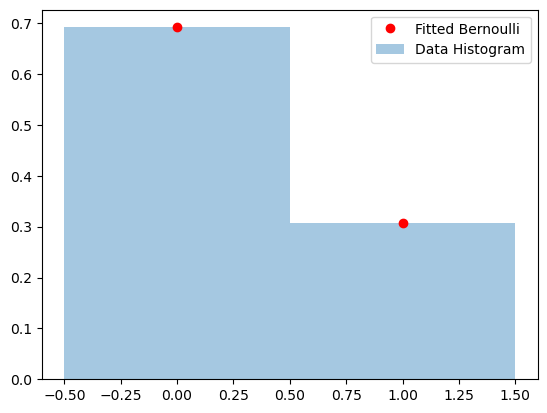

In [5]:
# plot data histogram vs. fited distribution
model.bernoulli_plot(fitted_mle_param)

In [6]:
# perform Goodness of Fit test
# This should raise error
gof_test = gof.Gof(dist_type='bernoulli', par=(fitted_mle_param))
gof_test.gof(data)

ValueError: GoF is not valid for Bernoulli.

### 2) Binomial(10, 0.7)

In [5]:
# generate data
# binomial with n=1 is Bernoulli
data_dist = dgn.Datagen(dist_type='binomial', row_count=2000, par=(10, 0.7), seed=1) 
data = data_dist.data_generation()

In [6]:
model = dft.Fitting(data, dist_type='binomial', n=10)
(n,p) = model.fit()
print("The fitted MLE parameters are %(n)d %(p).4f." %{'n':n, 'p':p})


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.


The fitted MLE parameters are 10 0.6968.


In [11]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 10


['Binomial', 'Geometric', 'Poisson']

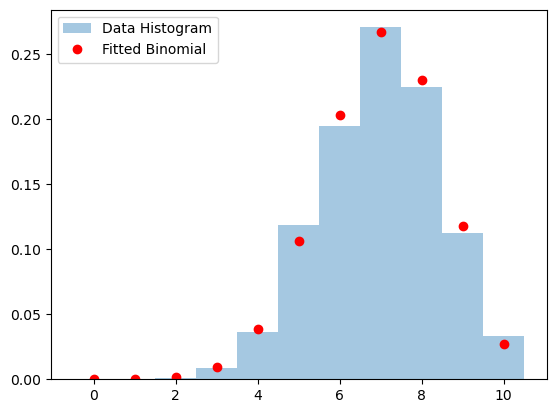

In [7]:
model.binomial_plot((n,p))

In [8]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='binomial', par=(n,p))
gof_test.gof(data, k=10, alfa=0.05)

Test Statistics: 8.3381;  Critical Value: 14.0671
Accept H0 that the distribution is a good fit at the given significance level.


True

In [9]:
# perform Goodness of Fit test for geometric
# first fit data to geometric
model = dft.Fitting(data, dist_type='geometric') 

gof_test = gof.Gof(dist_type='geometric', par=model.fit())
gof_test.gof(data)

Test Statistics: 4039.7864;  Critical Value: 7.8147
Reject H0, the distribution is NOT a good fit at this significance level.


False

In [10]:
# perform Goodness of Fit test for poisson
# first fit data to Poisson
model = dft.Fitting(data, dist_type='poisson') 

gof_test = gof.Gof(dist_type='poisson', par=model.fit())
gof_test.gof(data)

Test Statistics: 669.7525;  Critical Value: 7.8147
Reject H0, the distribution is NOT a good fit at this significance level.


False

### 3) Geometric(0.42)

In [11]:
# generate data
data_dist = dgn.Datagen(dist_type='geometric', row_count=2000, par=(.42), seed=1) 
data = data_dist.data_generation()

In [12]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='geometric')
fitted_mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %fitted_mle_param)

The fitted MLE parameter is 0.4114.


In [13]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 12


['Binomial', 'Geometric', 'Poisson']

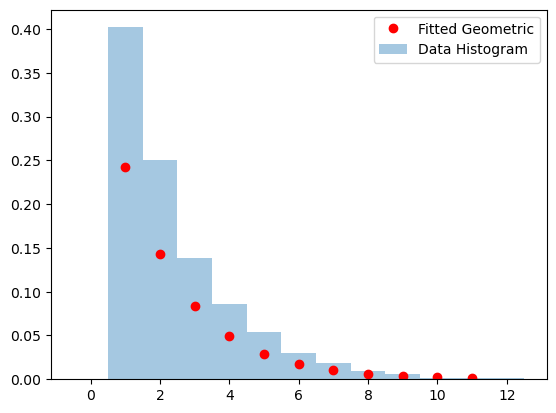

In [14]:
model.geometric_plot(fitted_mle_param)

In [15]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='geometric', par=(fitted_mle_param))
gof_test.gof(data, k=10)

Test Statistics: 12.4406;  Critical Value: 15.5073
Accept H0 that the distribution is a good fit at the given significance level.


True

### 4) Poisson(5)

In [28]:
# generate data
data_dist = dgn.Datagen(dist_type='poisson', row_count=2000, par=(2), seed=1) 
data = data_dist.data_generation()

In [29]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='poisson')
fitted_param = model.fit()
print("The fitted MLE parameter is %.4f." %fitted_param)

The fitted MLE parameter is 2.0255.


In [30]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 7


['Binomial', 'Geometric', 'Poisson']

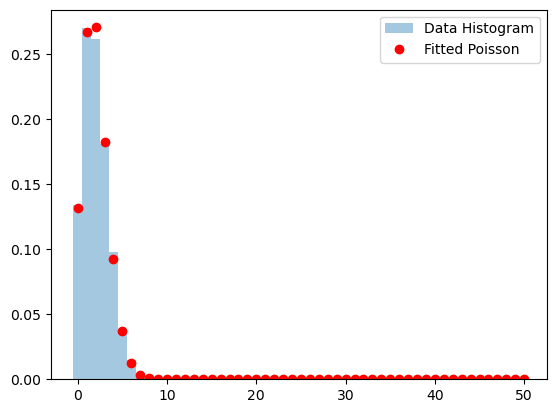

In [31]:
model.poisson_plot(fitted_param)

In [38]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='poisson', par=(fitted_param))
gof_test.gof(data)

Test Statistics: 8.1466;  Critical Value: 7.8147
Reject H0, the distribution is NOT a good fit at this significance level.


False

Note that the GoF test used in this library is approximate and if the test statistics is close to the critical value, caution should be excercised.
Let's run the Gof again at a different significance level:

In [39]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='poisson', par=(fitted_param))
gof_test.gof(data, alfa=.01)

Test Statistics: 8.1466;  Critical Value: 11.3449
Accept H0 that the distribution is a good fit at the given significance level.


True

In [36]:
# perform Goodness of Fit test for geometric
# first fit data to geometric
model = dft.Fitting(data, dist_type='geometric') 

gof_test = gof.Gof(dist_type='geometric', par=model.fit())
gof_test.gof(data, k=10)

Test Statistics: 101.6547;  Critical Value: 11.0705
Reject H0, the distribution is NOT a good fit at this significance level.


False

### 5) Uniform(2.3, 4.1)

In [73]:
# generate data
data_dist = dgn.Datagen(dist_type='uniform', row_count=2000, par=(2.3,4.1), seed=1) 
data = data_dist.data_generation()

In [74]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='uniform')
a, b = model.fit()
print("The fitted MLE parameters are %(a).4f %(b).4f." %{'a':a, 'b':b})

The fitted MLE parameters are 2.3002 4.0973.


In [75]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']

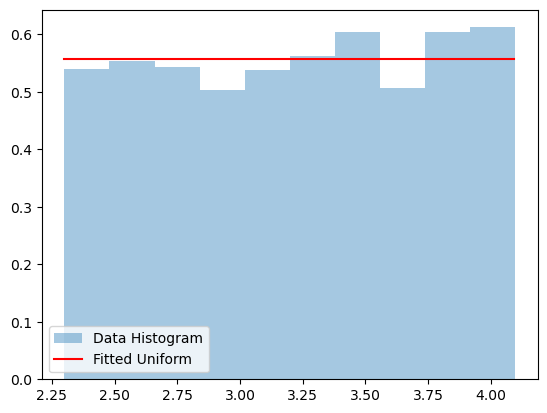

In [76]:
model.uniform_plot((a,b))

In [26]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='uniform', par=(a,b))
gof_test.gof(data)

Test Statistics: 0.6157;  Critical Value: 5.9915
Accept H0 that the distribution is a good fit at the given significance level.


True

### 6) Exponential(0.35)

In [77]:
# generate data
data_dist = dgn.Datagen(dist_type='exponential', row_count=2000, par=(0.35), seed=1) 
data = data_dist.data_generation()

In [78]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='exponential')
mle_param = model.fit()
print("The fitted MLE parameter is %.4f." %mle_param)

The fitted MLE parameter is 0.3593.


In [79]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']

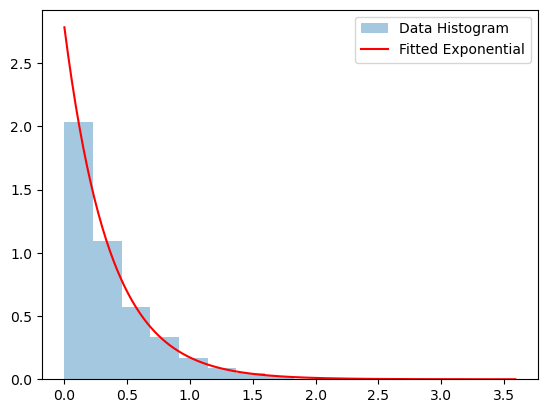

In [80]:
model.exponential_plot(mle_param)

In [81]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='exponential', par=mle_param)
gof_test.gof(data)

Test Statistics: 4.0574;  Critical Value: 7.8147
Accept H0 that the distribution is a good fit at the given significance level.


True

### 7) Normal(3,2)

In [31]:
# generate data
data_dist = dgn.Datagen(dist_type='normal', row_count=2000, par=(3,2), seed=1) 
data = data_dist.data_generation()

In [32]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='normal')
mu, sigma = model.fit()
print("The fitted MLE parameter is %(m).4f %(s).4f." %{'m':mu, 's':sigma})

The fitted MLE parameter is 3.0661 2.0122.


In [33]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Normal']


['Uniform', 'Normal']

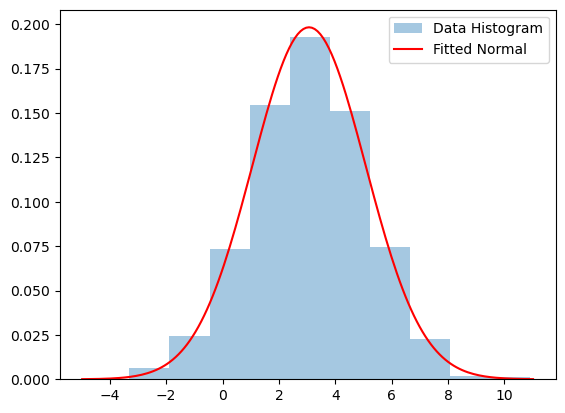

In [34]:
model.normal_plot(params=(mu, sigma))

In [35]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='normal', par=(mu,sigma))
gof_test.gof(data)

Test Statistics: 4.1215;  Critical Value: 5.9915
Accept H0 that the distribution is a good fit at the given significance level.


True

In [36]:
# perform Goodness of Fit test for uniform
# first fit data to uniform
model = dft.Fitting(data, dist_type='uniform') 

gof_test = gof.Gof(dist_type='uniform', par=model.fit())
gof_test.gof(data)

Test Statistics: 1726.9527;  Critical Value: 5.9915
Reject H0, the distribution is NOT a good fit at this significance level.


False

### 8) Weibull(2.1, 4.3)

In [21]:
# generate data
data_dist = dgn.Datagen(dist_type='weibull', row_count=2000, par=(2.1,4.3), seed=1) 
data = data_dist.data_generation()

In [22]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='weibull')
a, b = model.fit()
print("The fitted MLE parameter is %(m).4f %(s).4f." %{'m':a, 's':b})

The fitted MLE parameter is 2.0678 4.3409.


In [23]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Normal', 'Weibull', 'Gamma']

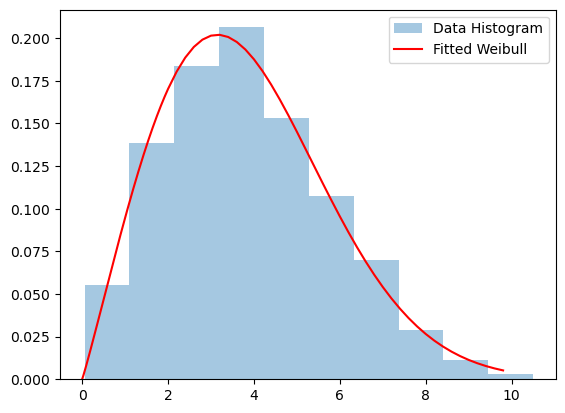

In [24]:
model.weibull_plot((a,b))

In [25]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='weibull', par=(a,b))
gof_test.gof(data)

Test Statistics: 3.4686;  Critical Value: 5.9915
Accept H0 that the distribution is a good fit at the given significance level.


True

In [26]:
# perform Goodness of Fit test for gamma
# first fit data to gamma
model = dft.Fitting(data, dist_type='gamma') 

gof_test = gof.Gof(dist_type='gamma', par=model.fit())
gof_test.gof(data)

Test Statistics: 43.2718;  Critical Value: 5.9915
Reject H0, the distribution is NOT a good fit at this significance level.


False

In [27]:
# perform Goodness of Fit test for normal
# first fit data to normal
model = dft.Fitting(data, dist_type='normal') 

gof_test = gof.Gof(dist_type='normal', par=model.fit())
gof_test.gof(data)

Test Statistics: 74.5496;  Critical Value: 5.9915
Reject H0, the distribution is NOT a good fit at this significance level.


False

### 9) Gamma(3.1, 5.6)

In [5]:
# generate data
data_dist = dgn.Datagen(dist_type='gamma', row_count=5000, par=(3.1,5.6), seed=1) 
data = data_dist.data_generation()

In [6]:
# estimate MLE parameter
model = dft.Fitting(data, dist_type='gamma')
a, b = model.fit()
print("The fitted MLE parameter is %(a).4f %(b).4f." %{'a':a, 'b':b})

The fitted MLE parameter is 3.0262 5.7138.


In [7]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

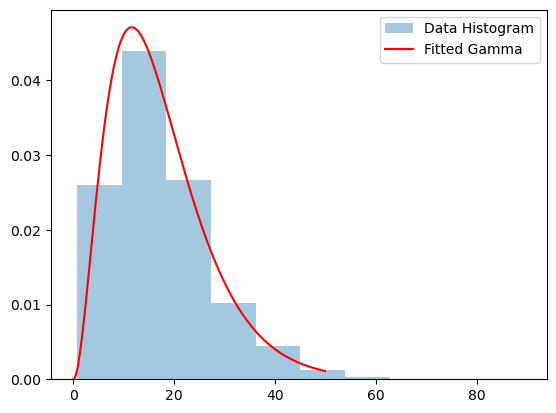

In [8]:
model.gamma_plot((a,b))

In [9]:
# perform Goodness of Fit test
gof_test = gof.Gof(dist_type='gamma', par=(a,b))
gof_test.gof(data, k=5)

Test Statistics: 1.7092;  Critical Value: 3.8415
Accept H0 that the distribution is a good fit at the given significance level.


True